In [61]:
import seaborn as sns

#1. Import libraries:

In [62]:
#import numpy and pandas and all requierd modules.
#Your code here:
!pip install -U yellowbrick
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib as mpl



from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm
from google.colab import files

%matplotlib inline


#2. Load your csv file:
Enter a string with the name of your data file.
For example:
if your data file is named "data.csv" than enter:
df = pd.read_csv("data.csv")


In [63]:
from google.colab import files
file = files.upload()
df = pd.read_csv("M1_final.csv")


Saving M1_final.csv to M1_final (1).csv


In [64]:
df.head(5)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,is_in_time,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT,crew,travelers,group
0,11,1,5,B6,N828JB,CHS,-1,yes,124,636,324,323,448,48,34,58,W,25,38,29.86,Fair / Windy,9,17,14,21,73,1
1,11,1,5,B6,N992JB,LAX,-7,yes,371,2475,340,333,531,48,34,58,W,25,38,29.86,Fair / Windy,9,17,15,1,83,3
2,11,1,5,B6,N959JB,FLL,40,yes,181,1069,301,341,482,48,34,58,W,25,38,29.86,Fair / Windy,9,17,22,14,84,3
3,11,1,5,B6,N999JQ,MCO,-2,yes,168,944,345,343,513,48,34,58,W,25,38,29.86,Fair / Windy,9,17,12,8,81,3
4,11,1,5,DL,N880DN,ATL,-4,yes,139,760,360,356,499,46,32,58,W,24,35,29.91,Fair / Windy,9,17,13,1,88,3


In [65]:
df.dtypes

MONTH                  int64
DAY_OF_MONTH           int64
DAY_OF_WEEK            int64
OP_UNIQUE_CARRIER     object
TAIL_NUM              object
DEST                  object
DEP_DELAY              int64
is_in_time            object
CRS_ELAPSED_TIME       int64
DISTANCE               int64
CRS_DEP_M              int64
DEP_TIME_M             int64
CRS_ARR_M              int64
Temperature            int64
Dew Point             object
Humidity               int64
Wind                  object
Wind Speed             int64
Wind Gust              int64
Pressure             float64
Condition             object
sch_dep                int64
sch_arr                int64
TAXI_OUT               int64
crew                   int64
travelers              int64
group                  int64
dtype: object

#3. Using the describe and shape methods- display a summary of the data.
#Make sure all columns are displayed in the describe method including the categorical ones.

In [66]:
#Your code here:
#Describe:
df.describe(include = 'all')

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,is_in_time,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT,crew,travelers,group
count,28820.000000,28820.000000,28820.000000,28820,28820,28820,28820.000000,28820,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820,28820.000000,28818,28820.000000,28820.000000,28820.000000,28820,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000
unique,NaN,NaN,NaN,9,2092,65,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,64,NaN,18,NaN,NaN,NaN,25,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,B6,N102NN,LAX,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,33,NaN,W,NaN,NaN,NaN,Mostly Cloudy,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,9589,108,2974,NaN,27354,NaN,NaN,NaN,NaN,NaN,NaN,1349,NaN,3273,NaN,NaN,NaN,9124,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.894240,16.021096,4.008952,NaN,NaN,NaN,6.374983,NaN,225.288203,1267.746079,831.003851,828.934698,910.874289,41.489833,NaN,57.732616,NaN,12.367627,5.535323,30.092433,NaN,31.091256,28.432130,20.858570,25.081332,74.949202,2.396877
std,4.991723,8.750179,1.985230,NaN,NaN,NaN,38.735144,NaN,119.482417,889.343246,299.398525,305.864103,345.411743,8.043533,NaN,23.468676,NaN,6.259298,11.886457,0.296160,NaN,9.510359,8.263043,6.851915,14.131529,14.763018,0.868911
min,1.000000,1.000000,1.000000,NaN,NaN,NaN,-22.000000,NaN,57.000000,94.000000,301.000000,1.000000,1.000000,17.000000,NaN,0.000000,NaN,0.000000,0.000000,29.200000,NaN,0.000000,0.000000,5.000000,0.000000,50.000000,1.000000
25%,1.000000,8.000000,2.000000,NaN,NaN,NaN,-6.000000,NaN,124.000000,483.000000,545.000000,542.000000,667.000000,36.000000,NaN,46.000000,NaN,8.000000,0.000000,29.880000,NaN,26.000000,21.000000,16.000000,13.000000,62.000000,1.000000
50%,11.000000,16.000000,4.000000,NaN,NaN,NaN,-3.000000,NaN,188.000000,1029.000000,856.000000,854.000000,918.000000,42.000000,NaN,59.000000,NaN,12.000000,0.000000,30.110000,NaN,30.000000,30.000000,19.000000,25.000000,75.000000,3.000000
75%,12.000000,24.000000,6.000000,NaN,NaN,NaN,2.000000,NaN,365.000000,2248.000000,1095.000000,1097.000000,1193.000000,47.000000,NaN,74.000000,NaN,16.000000,0.000000,30.320000,NaN,37.000000,35.000000,25.000000,37.000000,88.000000,3.000000


In [67]:
#Your code here:
#Shape:
df.shape

(28820, 27)

#4. Using pd.drop, remove all categorical/ID columns.
Remember: if you wish to assign the changes made in your dataframe, than the dataframe should be assigned once again.




In [68]:
#Your code here:
df_new=df 
df_new = df.drop(columns=['TAIL_NUM', 'Condition'])

#5.Create a histogram:

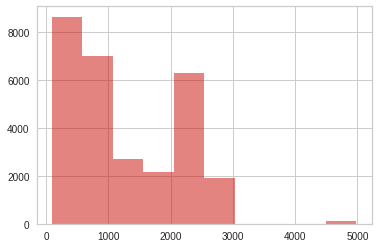

In [69]:
#Your code here:

df_new["DISTANCE"].hist(color='r',alpha=0.5)

#6. XY scatter/ line plot:


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


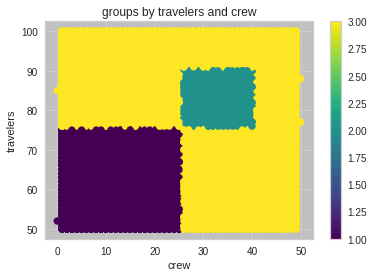

In [70]:
#Your code here:
sc=plt.scatter(df.crew, df.travelers, c=df.group,cmap='viridis')
plt.xlabel("crew")
plt.ylabel("travelers")
plt.title("groups by travelers and crew")
ax = plt.axes()
ax.set_facecolor('silver')
plt.colorbar(sc)

#7. Create a new dataframe named df_numeric with only numeric (float/int) variables.

In [71]:
df_numeric= df[['DAY_OF_WEEK','Temperature','Humidity']]


#8.Perform K-means algorithm on df_numeric with K=5

In [72]:
#Your code here:
X = df_numeric.to_numpy()
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
print(kmeans.labels_,len(kmeans.labels_))

[0 0 0 ... 2 2 2] 28820


#9. For df_numeric, find the best k between 2-12 using the elbow method:

In [ ]:
#Your code here:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show() 

#10. Answer to the following questions:


*   What is the best K?
*   How did you find this value?
*   What are the characteristics of good clustering?






#your answer here:
What is the best K? **4**<br>
How did you find this value? **we found the answer by using the graph of elbow method**<br>
What are the characteristics of good clustering?
1. A grouping for a group will be cohesive, close, tight and dense to each other.
2. Between one cluster grouping and a second cluster, there will be as much separation as possible.


#11. For df_numeric, find the best k between 2-12 using the Silhouette method:

In [ ]:
#Your code here:
########################  Silhouette
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
#list(range(2,12))

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on Mall data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

#12. Answer to the following questions:


*   Did both methods chose the same best k?
*   If yes, what is the K?
*   If not, Any idea how to choose the best K?



#your answer here:
Did both methods chose the same best k? **no**<br>
If yes, what is the K? **the answer for the first question was 'no'**<br>
If not, Any idea how to choose the best K? **If there is a disagreement between the two methods, we will choose to use the Silhouette method because this method relies on both density and distance between group classifications, while the elbow method relies only on density and therefore we will choose to use the shadow method. (Silhouette )**



#13. Using the original dataframe (df), perform the following steps:
i. remove all categorocal coulmns with more than 3 categories.

ii. check for missing values (NAs) using df.isnull().sum()

iii. if there are missing values remove them using df.dropna()

iv. convert all categorical columns to numerical.


In [ ]:
#Your code here:
#answer i:
catColumns = df.select_dtypes(['object']).columns
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for col in catColumns:
    n = len(df[col].unique())
    if (n > 3):
       X = pd.get_dummies(df[col])
       X = X.drop(X.columns[0], axis=1)
       df[X.columns] = X
       df.drop(col, axis=1, inplace=True)  # drop the original categorical variable (optional)
    else:
       le.fit(df[col])
       df[col] = le.transform(df[col])


In [ ]:

df=df.iloc[:,:21]
df.head(20)

In [ ]:
#answer ii:
df.isnull().sum()

#answer iii: **There are no missing values**
#answer iv. convert all categorical columns to numerical.<br>
**in the code you can see thet column 'is_in_time' converted to '1' and '0'**<br>
1= yes
0= no

#14. Choose a "Y " variable (a column with 2 categories), see instructions:

In [ ]:
#Your code here:
Y=df.pop('is_in_time')

df.insert(df.shape[1], 'is_in_time', Y)


#15. Perform the following steps:
a. Split your data tp train (80%) and test (20%) using **train_test_split**.

b. Train a logistic regression model using the function **LogisticRegression**  and the function **fit**.

c. Predict the Y variable on the test set using the **predict** function, assign the result to an object named predictions. 

d. Using the **score** function, compute and print the prediction accuracy of the predictions object.

e. Create a confusion matrix using the **confusion_matrix** function and assign the result to an object named cm.

f. Print the confusion matrix as a plot.

In [ ]:
#Your code here:
#answer a:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.20, random_state=0)
print(x_train.shape)
print(y_test)


x_train.head()

In [ ]:
#answer b:
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

In [ ]:
#answer c:
predictions = logisticRegr.predict(x_test)

In [ ]:
#answer d:
score_train = logisticRegr.score(x_train, y_train)
print("score_train=")
print(score_train)
score_test = logisticRegr.score(x_test, y_test)
print("score_test=")
print(score_test)

In [ ]:
#answer e:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

In [ ]:
#answer f:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'YlGnBu');
plt.ylabel('Actual label (ground truth)');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0:.3f}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('toy_df_Confusion.png')

#16. Answer to the following questions:


*   What is the model accuracy? **0.947**
*   How many times the model predicted 0 correctly and how many times it predicted 1 correctly?<br>
the model predicted 0 correctly **0 times**<br>
the model predicted 1 correctly **5461 times**



#your answer here:



#Good Luck!!